In [16]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score


In [17]:
# make_moons(): to generate synthetic data in the shape of crescents:

features,true_labels=make_moons(n_samples=250, noise=0.05, random_state=42)

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


In [19]:
# Instantiate k-means and dbscan algorithms
kmeans = KMeans(n_clusters=2)
dbscan = DBSCAN(eps=0.3)

# Fit the algorithms to the features
kmeans.fit(scaled_features)
dbscan.fit(scaled_features)

# Compute the silhouette scores for each algorithm
kmeans_silhouette = silhouette_score(scaled_features,kmeans.labels_).round(2)
dbscan_silhouette = silhouette_score(scaled_features, dbscan.labels_).round (2)

In [20]:
kmeans_silhouette

0.5

In [21]:
dbscan_silhouette

0.38

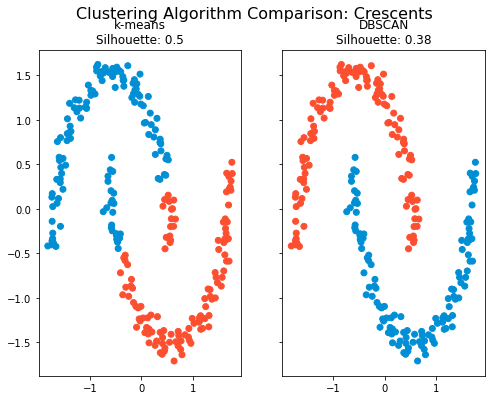

In [26]:
import matplotlib.pyplot as plt

# Plot the data and cluster silhouette comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 6), sharex=True, sharey=True)
fig.suptitle(f"Clustering Algorithm Comparison: Crescents", fontsize=16)
fte_colors = {0: "#008fd5",1: "#fc4f30"}
# The k-means plot
km_colors = [fte_colors[label] for label in kmeans.labels_]
ax1.scatter(scaled_features[:, 0], scaled_features[:, 1], c=km_colors)
ax1.set_title(f"k-means\nSilhouette: {kmeans_silhouette}", fontdict={"fontsize": 12})
# The dbscan plot
db_colors = [fte_colors[label] for label in dbscan.labels_]
ax2.scatter(scaled_features[:, 0], scaled_features[:, 1], c=db_colors)
ax2.set_title(f"DBSCAN\nSilhouette: {dbscan_silhouette}", fontdict={"fontsize": 12})
plt.show()

# adjusted rand index (ARI):
# Unlike the silhouette coefficient, the ARI uses true cluster assignments to measure the similarity between true and predicted labels.

In [27]:
#The ARI output values range between -1 and 1. A score close to 0.0 indicates random assignments, 
#and a score close to 1 indicates perfectly labeled clusters.

ari_kmeans = adjusted_rand_score(true_labels, kmeans.labels_)

ari_dbscan = adjusted_rand_score(true_labels, dbscan.labels_)

print(round(ari_kmeans, 2), round(ari_dbscan, 2))

0.47 1.0
